In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open('./data/.models_full_data/full_data_fit_true_4.obj', 'rb') as infile:
    data = pickle.load(infile)


#with open('./data/.models_full_data/full_data_run_CI_record.obj', 'rb') as infile:
#    data = pickle.load(infile)

{'normative': {'congruent': [], 'incongruent': []},
 'LC_discrete': {'congruent': [], 'incongruent': []},
 'LC_discrete_att': {'congruent': [], 'incongruent': []},
 'change_obs_fk': {'congruent': [], 'incongruent': []}}

In [6]:
trial_entropies = {
    'normative': {
        'congruent': [],
        'incongruent': []
    },
    'LC_discrete': {
        'congruent': [],
        'incongruent': []
    },
    'LC_discrete_att': {
        'congruent': [],
        'incongruent': []
    },
    'change_obs_fk': {
        'congruent': [],
        'incongruent': []
    }
}

for utid, utid_data in data.items():
    if utid[0] == '4':
        
        if utid_data['normative_&_1']['difficulty'] in ['congruent', 'incongruent']:
            for model, mod_data in utid_data.items():
                if 'prior' in model:
                    continue
                trial_entropies[model.split('_&_')[0]][mod_data['difficulty']].append(mod_data['entropy_history'])

for model, model_data in trial_entropies.items(): 
    for difficulty, values in model_data.items():
        trial_entropies[model][difficulty] = np.stack(values, axis=1)     

print(trial_entropies.keys())

dict_keys(['normative', 'LC_discrete', 'LC_discrete_att', 'change_obs_fk'])


In [15]:
np.nanmean(normative_entropy['incongruent'], axis=1)

array([13.93156857, 13.93156857, 13.90256751, 13.8530391 , 13.75882843,
       13.09706914, 12.21319678, 11.31994813, 10.31429251,  9.29904718,
        8.50843391,  7.90653767,  7.38177621,  6.96364868,  6.53014669,
        6.10903826,  5.6962511 ,  5.33973899,  5.1440883 ,  4.90409247,
        4.68695869,  4.46542268,  4.27909981,  4.13323733,  3.98416931,
        3.85131363,  3.65333672,  3.53026556,  3.45270515,  3.30895996,
        3.15758425,  3.08159408,  3.01002032,  2.96228779,  2.94876751,
        2.89116266,  2.80541876,  2.70430024,  2.61691136,  2.58036788,
        2.49844494,  2.41428627,  2.36618116,  2.38159958,  2.34439637,
        2.19462675,  2.17598429,  2.10434313,  2.02599809,  1.91984218,
        1.9066114 ,  1.85655266,  1.75388733,  1.66417533,  1.61617272,
        1.58910922,  1.55211232,  1.52430638,  1.48871802,  1.4348693 ,
        1.41655226,  1.39080938,  1.34611561,  1.34344263,  1.31465922,
        1.28990072,  1.19141945,  1.15547859,  1.15310432,  1.15

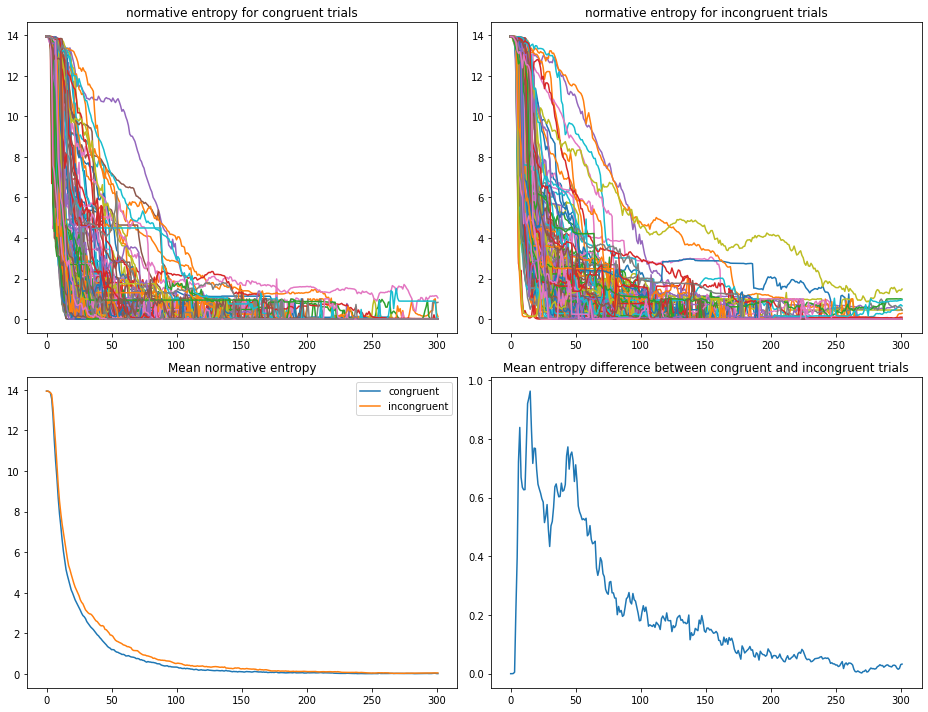

In [17]:
model = 'normative'
normative_entropy = trial_entropies[model]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

axs[0, 0].plot(normative_entropy['congruent'])
axs[0, 0].set_title(f'{model} entropy for congruent trials')

axs[0, 1].plot(normative_entropy['incongruent'])
axs[0, 1].set_title(f'{model} entropy for incongruent trials')

axs[1, 0].plot(np.nanmean(normative_entropy['congruent'], axis=1), label='congruent')
axs[1, 0].plot(np.nanmean(normative_entropy['incongruent'], axis=1), label='incongruent')
axs[1, 0].set_title(f'Mean {model} entropy')
axs[1, 0].legend()

axs[1, 1].plot(np.nanmean(normative_entropy['incongruent'], axis=1) - np.nanmean(normative_entropy['congruent'], axis=1))
axs[1, 1].set_title('Mean entropy difference between congruent and incongruent trials')

plt.tight_layout()
plt.show()

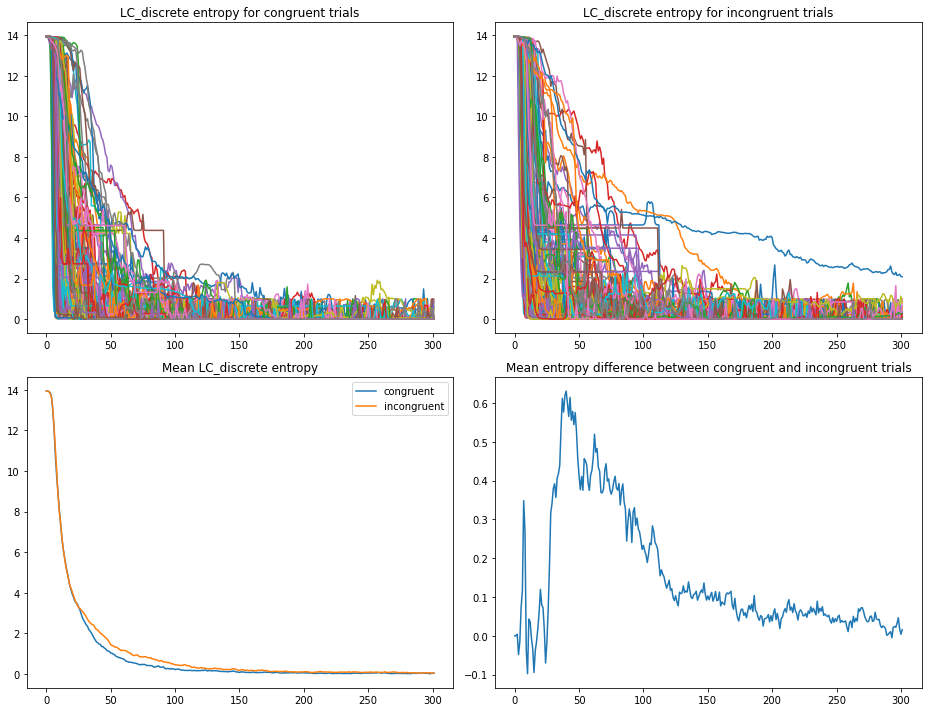

In [ ]:
model = 'LC_discrete'
normative_entropy = trial_entropies[model]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

axs[0, 0].plot(normative_entropy['congruent'])
axs[0, 0].set_title(f'{model} entropy for congruent trials')

axs[0, 1].plot(normative_entropy['incongruent'])
axs[0, 1].set_title(f'{model} entropy for incongruent trials')

axs[1, 0].plot(np.nanmean(normative_entropy['congruent'], axis=1), label='congruent')
axs[1, 0].plot(normative_entropy['incongruent'].mean(axis=1), label='incongruent')
axs[1, 0].set_title(f'Mean {model} entropy')
axs[1, 0].legend()

axs[1, 1].plot(np.nanmean(normative_entropy['incongruent'] - normative_entropy['congruent'], axis=1))
axs[1, 1].set_title('Mean entropy difference between congruent and incongruent trials')

plt.tight_layout()
plt.show()

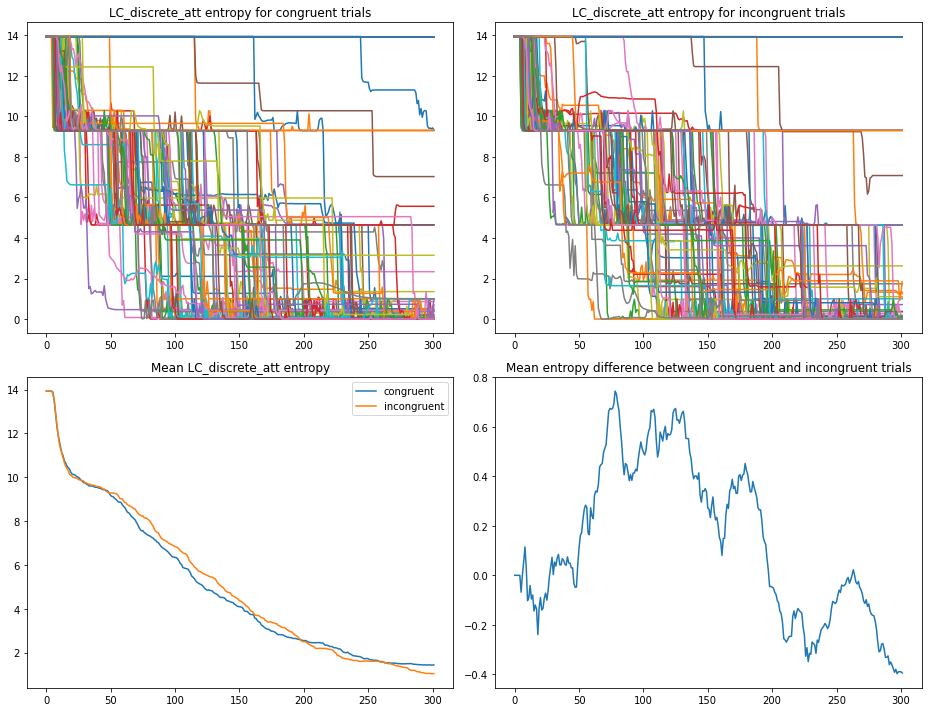

In [ ]:
model = 'LC_discrete_att'
normative_entropy = trial_entropies[model]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

axs[0, 0].plot(normative_entropy['congruent'])
axs[0, 0].set_title(f'{model} entropy for congruent trials')

axs[0, 1].plot(normative_entropy['incongruent'])
axs[0, 1].set_title(f'{model} entropy for incongruent trials')

axs[1, 0].plot(np.nanmean(normative_entropy['congruent'], axis=1), label='congruent')
axs[1, 0].plot(normative_entropy['incongruent'].mean(axis=1), label='incongruent')
axs[1, 0].set_title(f'Mean {model} entropy')
axs[1, 0].legend()

axs[1, 1].plot(np.nanmean(normative_entropy['incongruent'] - normative_entropy['congruent'], axis=1))
axs[1, 1].set_title('Mean entropy difference between congruent and incongruent trials')

plt.tight_layout()
plt.show()

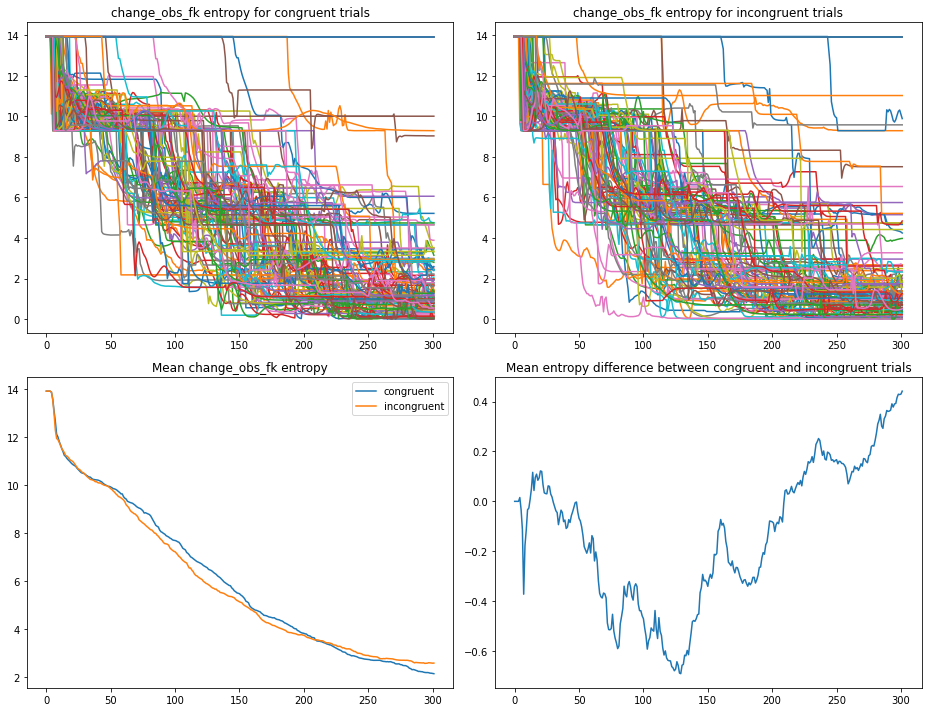

In [ ]:
model = 'change_obs_fk'
normative_entropy = trial_entropies[model]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

axs[0, 0].plot(normative_entropy['congruent'])
axs[0, 0].set_title(f'{model} entropy for congruent trials')

axs[0, 1].plot(normative_entropy['incongruent'])
axs[0, 1].set_title(f'{model} entropy for incongruent trials')

axs[1, 0].plot(np.nanmean(normative_entropy['congruent'], axis=1), label='congruent')
axs[1, 0].plot(normative_entropy['incongruent'].mean(axis=1), label='incongruent')
axs[1, 0].set_title(f'Mean {model} entropy')
axs[1, 0].legend()

axs[1, 1].plot(np.nanmean(normative_entropy['incongruent'] - normative_entropy['congruent'], axis=1))
axs[1, 1].set_title('Mean entropy difference between congruent and incongruent trials')

plt.tight_layout()
plt.show()